In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc, rcParams
from matplotlib.widgets import Button

import IPython.display as disp
from IPython.display import HTML

In [2]:
# gamma / 2 Pi in n MHz·T−1
gamma = 42.576

# computes gamma dot without relaxation
def M_dot_no_relax(M,B):
    return gamma * np.cross(M,B) * math.pi * 2

def M_no_relax(M_init, B, t):
    result = []
    a = 0;
    M = M_init;
    while a < t:
        result.append(M)
        #print ("M " + str(M))
        M_dot = M_dot_no_relax(M, B)
        #print ("M_dot", M_dot, str(LA.norm(M - M_dot)))
        step = 0.000001
        M = M + step * M_dot
        a = a + 1
    return result

#code to create buttons
def Mup(event):
    global M
    M = M *1.1
    
def Mdown(event):
    global M
    M = M * 0.9
    
def updateAnimation(M_init, B, t):
    ax.cla()
    ax.set_xlim3d(-limit, limit)
    ax.set_ylim3d(-limit, limit)
    ax.set_zlim3d(-limit, limit) 
    data = M_no_relax(M_init, B, t)
    global M 
    M = data[int((len(data)-1)*0.25)]
    data2 = np.transpose(np.reshape(data, (len(data),3), order='F'))
    return ax.plot(data2[0], data2[1], data2[2], label='Magnetization')

def init():
    return updateAnimation(M, B, 2000),

def animate(i):
    return updateAnimation(M, B, 2000),

rcParams['animation.writer'] = 'avconv'
rc('animation', html='none')

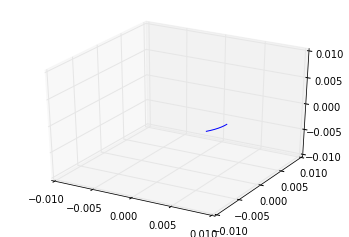

In [11]:
limit = 0.01
M = [0.006, 0, 0]
B = [0, 0, 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-limit, limit)
ax.set_ylim3d(-limit, limit)
ax.set_zlim3d(-limit, limit) 

rcParams['animation.html'] = 'html5'

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=False)

In [9]:
HTML(anim.to_html5_video())